Load data 

In [13]:
import pandas as pd
import numpy as np
import sklearn
import sys

print("sklearn version:", sklearn.__version__)
print("python exe:", sys.executable)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("../data/cleaned.csv")

df.head()


sklearn version: 1.8.0
python exe: c:\Python311\python.exe


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,2,4,58138.0,0,0,80,58,635,...,0,0,0,0,0,0,3,11,1,69
1,2174,1954,2,4,46344.0,1,1,157,38,11,...,0,0,0,0,0,0,3,11,0,72
2,4141,1965,2,5,71613.0,0,0,444,26,426,...,0,0,0,0,0,0,3,11,0,61
3,6182,1984,2,5,26646.0,1,0,199,26,11,...,0,0,0,0,0,0,3,11,0,42
4,5324,1981,4,3,58293.0,1,0,390,94,173,...,0,0,0,0,0,0,3,11,0,45


Define feature and target 

In [14]:
X = df.drop(columns=["Response"])
y = df["Response"]
feature_columns = X.columns.tolist()
feature_columns

X.shape, y.shape


((2240, 29), (2240,))

Train Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


Feature Scaling

In [16]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model 1: Logistic regresstion

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


evaluation

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.875
[[373   8]
 [ 48  19]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       381
           1       0.70      0.28      0.40        67

    accuracy                           0.88       448
   macro avg       0.79      0.63      0.67       448
weighted avg       0.86      0.88      0.85       448



Model 2: Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))


Accuracy: 0.8169642857142857
[[336  45]
 [ 37  30]]


MODEL 3: RANDOM FOREST

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.8839285714285714
[[377   4]
 [ 48  19]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       381
           1       0.83      0.28      0.42        67

    accuracy                           0.88       448
   macro avg       0.86      0.64      0.68       448
weighted avg       0.88      0.88      0.86       448



Model Comparision


In [21]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ]
})

results


,Model,Accuracy
0,Logistic Regression,0.875000
1,Decision Tree,0.816964
2,Random Forest,0.883929


Feature Importance

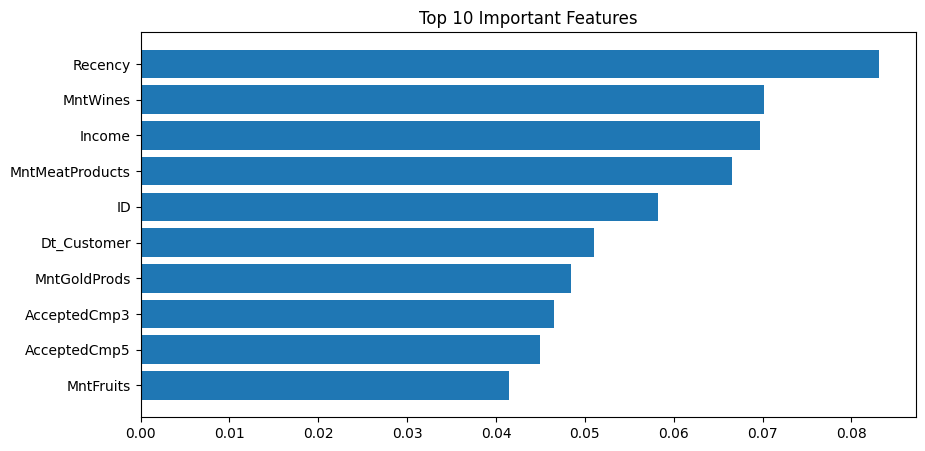

In [22]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = X.columns

feat_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feat_df.head(10)
plt.figure(figsize=(10,5))
plt.barh(feat_df["Feature"][:10], feat_df["Importance"][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Important Features")
plt.show()


In [23]:
import joblib

joblib.dump(rf, "../models/random_forest_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")
joblib.dump(feature_columns, "../models/feature_columns.pkl")

['../models/feature_columns.pkl']